<a href="https://colab.research.google.com/github/lcipolina/foocars/blob/lucia/FooCars_Step_By_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Foocars and why should I care?

Foocars is an inexpensive open source autonomous car driving system. It uses machine learning to create a robust method of driving cars around cones and obstaces.  "Cars" is broad term in this case. It's been used on toy cars, RC Cars, and single seater Power Wheels vehicles. This is an extremely low cost and robust option to get started in understanding autonomous vehicles.

For this project we''ll use the RC car version and work out how the car trains and later makes decisions based on the collected training data.


# The Foocars project 

It's located here: https://foocars.io

The main working repository for the project is here: https://github.com/fubarlabs/foocars

# The Code
This code implements Machine Learning techniques to generate an algorithm that allows a car to take driving decisions autonomously. 
The  algorithm is capable of identifying obstacles on a racing circuit allowing the car to avoid them.  

To calibrate (i.e. train) the algorithm we use pre-recorded images of obstacles usually found on a racing circuit. We process the images using Convolutional Neuronal Networks and obtain a set of parameters that are used by the car in real time to take steering decisions while racing. 

The code is divided in the following sections:

* Uploading the image data from an external repository
* Training the Convolutional Neuronal Networks using Python.
* Analizing the results




# Uploading the Training Data
The aim of this code is to train a Convolutional Neuronal Network to identify obtacles. We present the Network with a set of example objects and through iteration, it generates al algorithm to identify patters in the data. This allows us to classify objects into different kind of obstacles to be avoided (i.er. a cone, a shoe , a chair, etc).

We store the collected data in an external repository. The most convenient way of sharing data is to create a public folder in Google Drive.

This part of the code does the following:
* Uses pipenv to create a Virtual Environment.
* Downloads the image data and extracts it into a dedicated folder.



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

**NOTE:** Change the below to point the global variables to where the image data is located

In [0]:
%env USERNAME=lcipolina
!echo $USERNAME
!echo https://github.com/$USERNAME/foocars.git


env: USERNAME=lcipolina
lcipolina
https://github.com/lcipolina/foocars.git


We will make a local copy  (i.e. a clone) of the data repository. 
Previous to this, please create your own Fork of the project's main Repo in GitHub


In [0]:
# Cloning our own Fork of the project to our local repo.
!git clone https://github.com/$USERNAME/foocars.git

fatal: destination path 'foocars' already exists and is not an empty directory.


In [0]:
!ls

adc.json  data	foocars  sample_data


In [0]:
#we will install pipenv in foocars directory
%cd foocars

/content/foocars


In [0]:
!ls


cars		  installation.md  README.md	   tests
Dockerfile-car	  Pipfile	   schematics	   training
Dockerfile-train  Pipfile.lock	   setuppython.sh  utilities


In [0]:
#install pipenv in "foocars" directory
!pip install pipenv

In [0]:
#Create virtual environment in the folder we are in 
!pipenv install 

  $ pipenv --rm and rebuilding the virtual environment may resolve the issue.
  $ pipenv check will surely fail.
Installing dependencies from Pipfile.lock (426ee3)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 27/27 — 00:00:08
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [0]:
!ls

cars		  installation.md  README.md	   tests
Dockerfile-car	  Pipfile	   schematics	   training
Dockerfile-train  Pipfile.lock	   setuppython.sh  utilities


In [0]:
#Create folder /steelroses
#Download data file in folder  /content/data/cars/steelroses/collected
!mkdir -p /content/data/cars/steelroses
%cd /content/data/cars/steelroses

/content/data/cars/steelroses


In [0]:
# Load data from a shared folder in Google Drive
# Tutorial: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

import pdb #used to debug
import tarfile

fileID='https://drive.google.com/open?id=1jtW5aSS6dj1DNmxr87iHf1bzkBB1A3Km' # The shareable link to steelroses data
file = 'steelroses.collected.tar.gz'

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth  import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab  import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth             = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive             = GoogleDrive(gauth)
link              = fileID
fluff, id         = link.split('=')
print (id) # Verify that you have everything after '='
downloaded        = drive.CreateFile({'id':id}) 

downloaded.GetContentFile('steelroses.collected.tar.gz') 



1jtW5aSS6dj1DNmxr87iHf1bzkBB1A3Km


In [0]:
#Extracts the data file in the folder:  /content/data/cars/steelroses/collected
%cd /content/data/cars/steelroses
#!tar xvzf steelroses.collected.tar.gz #verbose
!tar xzf steelroses.collected.tar.gz #not verbose

/content/data/cars/steelroses


In [0]:
!ls

collected  steelroses.collected.tar.gz


# Environment is setup

We can run the software for training. But first we need to map the data to be accessible.

 1. Get g drive access to a cars curated training data
 2. Take a look at some of the images
 3. Train on the data set
 4. Select steerstats 
 5. Experiement let's look at steer stats
 6. What happens when we give it an image, what prediction is made
 7. Download the weights and steerstats to the car
 8. Test by running on the car

# Description of a Convolutional Neuronal Network

A Convolutional Neuronal Network is a common type of Neuronal Network used in image processing. The idea is to apply image filters in a smart way to reduce the size of images and make them more tractable. Additionally, by removing irrelevant data, the object's main features are highlighted, improving the accuracy of the object recognition algorithm. 

The smart filters are just mathematical operations applied in secuential order to reduce dimensions without losing accuracy.

After the convolution has been applied, the resulting images are passed to the traditional Neuronal Networks to train the classification parameters.





#Train the Convolutional Neuronal Network

We will use 'pipenv' to run the function inside the script 'train.py'.

We need to define some variables needed by the function. Below we provide example values.:

* Number of epochs:   --epochs 10 
* --save_frequency 2 
* path to data: 
/content/data/cars/steelroses/collected 

### The output of a Convolutional Neuronal Network run in Keras:
The python code below outputs the result of the following operations:


*  'conv2d' - Applies a 'convolution' operation (which is just a matrix by matrix multiplication) to reduce the matrix's dimension. 

* 'dropout'  - Is the implementation of the "dropout technique" to reduce parameter overfitting while preserving accuracy and classification power.

* 'Flatten'  - Is used to create back a single array of data after the previous operations have been applied.

These two opeations are applied iterated sequantially until a desired level or classification error is achieved.

In [0]:
#TRAIN THE MODEL
#Point to folder where the training function is located
#Output will be saved to files like: weights_year_month_day_20_28_08_epoch_0.h5

%cd /content/foocars/training/


/content/foocars/training


In [0]:
!ls

defines.py	  foocars	    readme.md	    train_history.py
dropout_model.py  history_model.py  steerstats.npz  train.py


In [0]:
!pipenv install numpy

  $ pipenv --rm and rebuilding the virtual environment may resolve the issue.
  $ pipenv check will surely fail.
Installing numpy…
Adding numpy to Pipfile's [packages]…
✔ Installation Succeeded 
Installing dependencies from Pipfile.lock (426ee3)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 27/27 — 00:00:09
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [0]:
#Run the training function. 
#Output is the data dimension after each Convo & Dropout  operation has been applied. 
!pipenv run python train.py --epochs 2 --save_frequency 2 /content/data/cars/steelroses/collected #path to data

  $ pipenv --rm and rebuilding the virtual environment may resolve the issue.
  $ pipenv check will surely fail.
Using TensorFlow backend.
tcmalloc: large alloc 6994501632 bytes == 0x4b50000 @  0x7f38b56f7001 0x7f38b313ede5 0x7f38b31a36f1 0x7f38b31a57cf 0x7f38b323e158 0x5030d5 0x506859 0x504c28 0x506393 0x634d52 0x634e0a 0x6385c8 0x63915a 0x4a6f10 0x7f38b52f2b97 0x5afa0a
tcmalloc: large alloc 3497254912 bytes == 0x1a59ca000 @  0x7f38b56f51e7 0x7f38b313eca1 0x7f38b31a6580 0x7f38b3236a82 0x5030d5 0x506859 0x504c28 0x506393 0x634d52 0x634e0a 0x6385c8 0x63915a 0x4a6f10 0x7f38b52f2b97 0x5afa0a
adding first convolutional layer
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
adding second convolutional layer
adding third convolutional layer
adding fourth convolutional layer
adding fifth convolutional layer
adding fully connected layer
adding output layer
_

In [0]:
!pip list | grep tensor #check Tensorflow is installed


mesh-tensorflow          0.0.5                
tensor2tensor            1.11.0               
tensorboard              1.13.1               
tensorboardcolab         0.0.22               
tensorflow               1.13.1               
tensorflow-estimator     1.13.0               
tensorflow-hub           0.4.0                
tensorflow-metadata      0.13.0               
tensorflow-probability   0.6.0                


## What are steerstats 

Let's look

In [0]:
#We can see the "weights...." files
!ls

defines.py	  readme.md	    weights_2019-06-11_22-36-47_epoch_0.h5
dropout_model.py  steerstats.npz    weights_2019-06-11_22-36-47_epoch_2.h5
foocars		  train_history.py  weights_2019-06-11_22-36-47_epoch_4.h5
history_model.py  train.py


## Download weights and steerstats

In [0]:
!pip install tqdm #gadget to show progress bar
from tqdm import tqdm

In [0]:
# get car files and download
!tar cvzf car.weights.tar.gz *.h5 *.npz
!rm *.h5 *.npz

weights_2019-06-11_22-36-47_epoch_0.h5
weights_2019-06-11_22-36-47_epoch_2.h5
weights_2019-06-11_22-36-47_epoch_4.h5
steerstats.npz


In [0]:
#remove results (to cleanup)
!rm *.h5 *.npz

rm: cannot remove '*.h5': No such file or directory
rm: cannot remove '*.npz': No such file or directory


In [0]:
!mkdir -p /content/data/cars/steelroses/model
!tar xvzf car.weights.tar.gz -C /content/data/cars/steelroses/model/

weights_2019-06-11_22-36-47_epoch_0.h5
weights_2019-06-11_22-36-47_epoch_2.h5
weights_2019-06-11_22-36-47_epoch_4.h5
steerstats.npz


In [0]:
#Download the weights files containing the output
files.download('car.weights.tar.gz')

## Examine the weights and steer stats

What does the computer think should happen?

In [0]:
steerstats = np.load('/content/data/cars/steelroses/model/steerstats.npz')


In [0]:
print(type(steerstats))
steerstats.keys()


<class 'numpy.lib.npyio.NpzFile'>


KeysView(<numpy.lib.npyio.NpzFile object at 0x7fdae1f45128>)

In [0]:
steerstats['arr_0'][0:10]


array([1394.95028935,  146.93441373])

## Examine the collected data



In [0]:
# commands.npz
filename = '/content/data/cars/steelroses/collected/commands_2018-12-06_12-54-17.npz'
commands = np.load( filename )
print(type(commands))


<class 'numpy.lib.npyio.NpzFile'>


In [0]:
print(commands.keys())
commands['arr_0'][0:10]

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fdae1f45390>)


array([[1411., 1502.],
       [1411., 1501.],
       [1411., 1501.],
       [1412., 1501.],
       [1412., 1501.],
       [1411., 1502.],
       [1411., 1501.],
       [1411., 1502.],
       [1412., 1501.],
       [1412., 1501.]], dtype=float16)

In [0]:
# IME npz
imu = np.load('/content/data/cars/steelroses/collected/IMU_2018-12-06_12-54-17.npz')
print(type(imu))

<class 'numpy.lib.npyio.NpzFile'>


In [0]:
print(imu.keys())
imu['arr_0'][0:10]

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fdae34948d0>)


array([[      0.,       0.,       0.,       0.,       0.,       0.,
        2777988.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2926810.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2926840.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2926850.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2926880.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2926910.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2926930.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2926950.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2926990.],
       [      0.,       0.,       0.,       0.,       0.,       0.,
        2927000.]], dtype=float32)

## What images were collected

In [0]:
images = np.load('/content/data/cars/steelroses/collected/imgs_2018-12-06_12-54-17.npz')
print(type(images))



<class 'numpy.lib.npyio.NpzFile'>


In [0]:
print(images.keys())
images['arr_0'][0]

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fdae1f4ce80>)


array([[[ 32,  50,  78],
        [113, 130, 159],
        [170, 198, 223],
        ...,
        [ 12,   0,   0],
        [ 11,   0,   0],
        [ 32,  15,   5]],

       [[ 46,  64,  92],
        [137, 155, 183],
        [158, 185, 210],
        ...,
        [ 13,   0,   0],
        [ 11,   0,   0],
        [ 32,  15,   5]],

       [[100, 124, 153],
        [170, 194, 223],
        [151, 170, 191],
        ...,
        [ 15,   0,   0],
        [ 12,   0,   0],
        [ 33,  16,   6]],

       ...,

       [[115, 118,  94],
        [114, 117,  93],
        [107, 110,  86],
        ...,
        [249, 228, 186],
        [255, 235, 192],
        [247, 226, 183]],

       [[116, 120,  94],
        [108, 112,  85],
        [104, 108,  82],
        ...,
        [255, 235, 192],
        [254, 233, 192],
        [244, 223, 183]],

       [[105, 109,  83],
        [107, 110,  84],
        [108, 112,  85],
        ...,
        [255, 234, 191],
        [249, 228, 188],
        [232, 210, 170]]

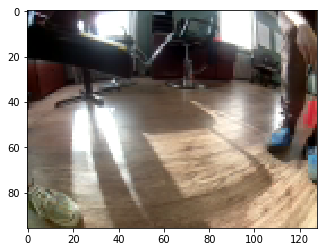

In [0]:

imgplot = plt.imshow(images['arr_0'][0])

**NOTE**: change the location of IMG_IN accordingly  

In [0]:
## Make a video clip
# Tutorial: https://www.apriorit.com/dev-blog/600-colab-for-video-processing

import cv2
VIDEO_FORMAT = 'VP90'
VIDEO_EXT = 'webm'

!mkdir -p /content/data/output

VIDEO_OUT = '/content/data/output.' + VIDEO_EXT
#IMG_IN = '/content/data/cars/steelroses/collected/imgs_2018-12-06_12-54-17.npz'
IMG_IN    = '/content/collected/imgs_2018-12-06_12-54-17.npz' #CHANGE THIS ACCORDINGLY

In [0]:
#THIS IS A TEST
image = images['arr_0'][0]
print(image.shape)

fourcc = cv2.VideoWriter_fourcc(*VIDEO_FORMAT)
writer = cv2.VideoWriter(VIDEO_OUT, fourcc, 30, (image.shape[1], image.shape[0]), True)


(96, 128, 3)


In [0]:

imgdata = np.load(IMG_IN)['arr_0']
print(f'\nShape: {imgdata.shape}\n')


#ITERATE  the first dimension and get the image from the rest
for index in tqdm(range(0,len(imgdata))):
  img = imgdata[index]
  writer.write(img)

writer.release()
print(f'Done: {VIDEO_OUT}')


FileNotFoundError: ignored

In [0]:

!ls /content/data

In [0]:
#Save video locally
#will save to: C:\Users\<username>\Downloads
files.download(VIDEO_OUT)


In [0]:
from IPython.core.display import Video

Video(VIDEO_OUT)


In [0]:
#THIS IS A TEST
# The dynamic video tag is not showing. Maybe, do this in javacsript
from IPython.core.display import display, HTML


HTML_SRC = """<video width="400" height="200">
<source src="/content/data/output.webm" type="video/x-webm"></source>
</video>"""
print(HTML_SRC)



             
display(HTML(HTML_SRC))             

# Consulting the Model
Uploading the trained weights


In [0]:
import keras
import tensorflow as tf
import concurrent.futures
from dropout_model import model
from defines import *




Using TensorFlow backend.


adding first convolutional layer
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
adding second convolutional layer
adding third convolutional layer
adding fourth convolutional layer
adding fifth convolutional layer
adding fully connected layer
adding output layer
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 64, 24)        1824      
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 64, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 32, 32)         19232     
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 32, 32)         0         
___

In [0]:
! ls /content/data/cars/steelroses/model

steerstats.npz				weights_2019-06-11_22-36-47_epoch_2.h5
weights_2019-06-11_22-36-47_epoch_0.h5	weights_2019-06-11_22-36-47_epoch_4.h5


In [0]:
DATA_DIR = '/content/data/cars'
CAR_NAME = 'steelroses'
WEIGHTS_DIR = DATA_DIR + "/" + CAR_NAME + '/model/'
WEIGHTS_FILE = WEIGHTS_DIR + 'weights_2019-04-06_13-00-23_epoch_4.h5'
STEERSTATS_FILE = DATA_DIR + "/" + CAR_NAME + '/model/steerstats.npz'
print(WEIGHTS_FILE)
print(STEERSTATS_FILE)



/content/data/cars/steelroses/model/weights_2019-04-06_13-00-23_epoch_4.h5
/content/data/cars/steelroses/model/steerstats.npz


In [0]:
# We upload( put model in memory) the trained model to analyze it
#same model as train.py 

# Use Dropout Model
# https://github.com/fubarlabs/foocars/blob/1e6b2bccac5b8595fd053816d9117169d35ae3a1/training/dropout_model.py



import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Embedding, Input, merge
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.regularizers import l2, l1
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras import backend as K



nrows=36
ncols=128
wr=0.00001 # l1 regularizer value
dp=0.125 # dropout rate 

# Note: Dan used the keras functional paradigm to define his network.
# I'm using the sequential paradigm. 
model=Sequential()
frame_in = Input(shape=(3, nrows, ncols), name='img_input')

#we should do a local contrast normalization

print("adding first convolutional layer")
#5x5 convolutional layer with a stride of 2
#model.add(BatchNormalization(input_shape=(nrows, ncols, 3)))
model.add(Conv2D(24, (5, 5), input_shape=(nrows, ncols, 3), strides=(2, 2), activation='elu', padding='same', kernel_initializer='lecun_uniform'))
#model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
model.add(Dropout(dp))

print("adding second convolutional layer")
#5x5 convolutional layer with a stride of 2
#model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='elu', padding='same', kernel_initializer='lecun_uniform'))
#model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
model.add(Dropout(dp))

print("adding third convolutional layer")
#5x5 convolutional layer with a stride of 2
#model.add(BatchNormalization())
model.add(Conv2D(40, (5, 5), strides=(2, 2), activation='elu', padding='same', kernel_initializer='lecun_uniform'))
#model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
model.add(Dropout(dp))

print("adding fourth convolutional layer")
#3x3 convolutional layer with no stride 
#model.add(BatchNormalization())
model.add(Conv2D(48, (3, 3), strides=(2, 2), activation='elu', padding='same', kernel_initializer='lecun_uniform'))
#model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
model.add(Dropout(dp))

print("adding fifth convolutional layer")
#3x3 convolutional layer with no stride 
#model.add(BatchNormalization())
model.add(Conv2D(48, (3, 3), strides=(2, 2), activation='elu', padding='same', kernel_initializer='lecun_uniform'))
#model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
#model.add(BatchNormalization())
model.add(Dropout(dp))


model.add(Flatten())

print("adding fully connected layer")
#fully connected layer
model.add(Dense(100, activation='elu', kernel_initializer='lecun_uniform'))
model.add(Dropout(dp))

print("adding output layer")
#fully connected layer to output node
model.add(Dense(1, activation='linear', kernel_initializer='lecun_uniform'))

model.compile(loss=['mse'], optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True), metrics=['mse'])
print(model.summary())


adding first convolutional layer
adding second convolutional layer
adding third convolutional layer
adding fourth convolutional layer
adding fifth convolutional layer
adding fully connected layer
adding output layer
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 18, 64, 24)        1824      
_________________________________________________________________
dropout_7 (Dropout)          (None, 18, 64, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 32, 32)         19232     
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 32, 32)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 16, 40)         32040     
__________________________________________________________

In [0]:
 # Take the trained weights file and load into the model
  model.load_weights(WEIGHTS_FILE)
  model._make_predict_function()
  global g_steerstats #steering info
  g_steerstats=np.load(STEERSTATS_FILE)['arr_0']
  
  #g_camera=picamera.PiCamera()
  #g_camera.resolution=(128, 96)
  #g_camera.framerate=FRAME_RATE

OSError: ignored

In [0]:
#defines image size:
row_offset=30
nrows=36
ncols=128


#imgdata = np.load(IMG_IN)['arr_0'].astype('float32')
imgdata = np.load(IMG_IN)['arr_0'] #give it an image
print(f'\nShape: {imgdata.shape}\n')

index = 1
img = imgdata[index]

# Image must be in the shape the model is using
#ValueError: Error when checking input: expected conv2d_6_input to have shape (36, 128, 3) but got array with shape (96, 128, 3)
# original image shape (200, 96, 128, 3)

#imagerawdata=np.reshape(np.fromstring(s, dtype=np.uint8), (96, 128, 3), 'C')
#imdata=imagerawdata[20:56, :]

#pre process - cleaning and standardizing
immean=img.mean()
imvar=img.std()
g_imageData=np.copy((imgdata-immean)/imvar) #standardizing 
fimg = g_imageData[0]

crop_image=fimg[row_offset:row_offset+nrows, :]
image_mean=crop_image.mean()
image_std=crop_image.std()
guess_image=(crop_image-image_mean)/image_std


#The actual prediction (!!!!)
#I give you an image, you give me back the steering decision !!!
pred=model.predict(np.expand_dims(guess_image, axis=0))      
steer_command=pred[0][0]*g_steerstats[1]+g_steerstats[0]

print(f'pred: {pred}, steer: {steer_command}')

FileNotFoundError: ignored

In [0]:
!ls